In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_finance import candlestick_ochl
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import coint

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df1 = pd.read_csv('cu1901.csv')
df2 = pd.read_csv('cu1902.csv')

In [1]:
df = df1.merge(df2, how='outer', on='datetime')

NameError: name 'df1' is not defined

In [2]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [48]:
df['datetime'].iloc[71:164]

1826    2018-02-13 00:00:00.000000000
1827    2018-02-13 00:05:00.000000000
1828    2018-02-13 00:10:00.000000000
1829    2018-02-13 00:15:00.000000000
1830    2018-02-13 00:20:00.000000000
                    ...              
1914    2018-02-13 23:35:00.000000000
1915    2018-02-13 23:40:00.000000000
1916    2018-02-13 23:45:00.000000000
1917    2018-02-13 23:50:00.000000000
1918    2018-02-13 23:55:00.000000000
Name: datetime, Length: 93, dtype: object

In [13]:
df

,datetime,SHFE.cu1901.open,SHFE.cu1901.high,SHFE.cu1901.low,SHFE.cu1901.close,SHFE.cu1901.volume,SHFE.cu1901.open_oi,SHFE.cu1901.close_oi,SHFE.cu1902.open,SHFE.cu1902.high,SHFE.cu1902.low,SHFE.cu1902.close,SHFE.cu1902.volume,SHFE.cu1902.open_oi,SHFE.cu1902.close_oi
1755,2018-02-12 09:50:00.000000000,52950.0,52950.0,52950.0,52950.0,0.0,473.0,473.0,53270.0,53270.0,53270.0,53270.0,1.0,0.0,1.0
1756,2018-02-12 09:55:00.000000000,52950.0,52950.0,52950.0,52950.0,0.0,473.0,473.0,53270.0,53270.0,53270.0,53270.0,0.0,1.0,1.0
1757,2018-02-12 10:00:00.000000000,52950.0,52950.0,52950.0,52950.0,0.0,473.0,473.0,53270.0,53270.0,53270.0,53270.0,0.0,1.0,1.0
1758,2018-02-12 10:05:00.000000000,52950.0,52950.0,52950.0,52950.0,0.0,473.0,473.0,53270.0,53270.0,53270.0,53270.0,0.0,1.0,1.0
1759,2018-02-12 10:10:00.000000000,52950.0,52950.0,52950.0,52950.0,0.0,473.0,473.0,53270.0,53270.0,53270.0,53270.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,2019-01-15 14:35:00.000000000,46940.0,46940.0,46940.0,46940.0,5.0,1075.0,1075.0,46970.0,47000.0,46970.0,46980.0,499.0,55823.0,55874.0
22189,2019-01-15 14:40:00.000000000,46940.0,46940.0,46940.0,46940.0,0.0,1075.0,1075.0,46980.0,47010.0,46970.0,46990.0,877.0,55874.0,55762.0
22190,2019-01-15 14:45:00.000000000,46940.0,46940.0,46940.0,46940.0,0.0,1075.0,1075.0,46990.0,47000.0,46980.0,47000.0,208.0,55762.0,55806.0
22191,2019-01-15 14:50:00.000000000,46940.0,46940.0,46940.0,46940.0,0.0,1075.0,1075.0,47000.0,47000.0,46980.0,46980.0,186.0,55806.0,55755.0


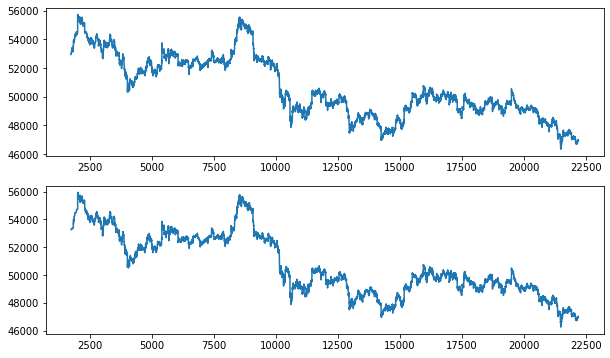

In [96]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1) # 
plt.plot(df['SHFE.cu1901.close'])
# plt.title('SHFE.cu1901.close')
plt.subplot(2, 1, 2) # , figsize=(8,3)
plt.plot(df['SHFE.cu1902.close'])
# plt.title('SHFE.cu1902.close')

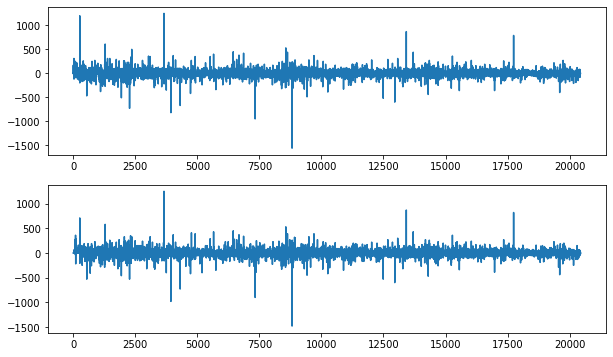

In [99]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1) # 
plt.plot(np.diff(df['SHFE.cu1901.close']))
# plt.title('SHFE.cu1901.close')
plt.subplot(2, 1, 2) # , figsize=(8,3)
plt.plot(np.diff(df['SHFE.cu1902.close']))
# plt.title('SHFE.cu1902.close')

In [31]:
df['diff'] = df['SHFE.cu1901.close'] - df['SHFE.cu1902.close']

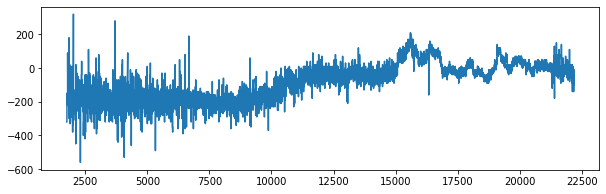

In [97]:
plt.figure(figsize=(10,3))
plt.plot(df['diff'])
plt.show()

In [78]:
# ts.adfuller(np.diff(df['SHFE.cu1901.close'][1:1000]),1)[1]
coint(df['SHFE.cu1901.close'][1:1000], df['SHFE.cu1902.close'][1:1000])[1]

6.922455057721147e-17

In [79]:
# 协整检验的函数
def cointegration_test(series01, series02):
    p1 = ts.adfuller(series01, 1)[1]
    p2 = ts.adfuller(series01, 1)[1]
    # 同时平稳或不平稳则差分再次检验
    if (p1 > 0.1 and p2 > 0.1) or (p1 < 0.1 and p2 < 0.1):
        p1_diff = ts.adfuller(np.diff(series01), 1)[1]
        p2_diff = ts.adfuller(np.diff(series02), 1)[1]
        # 同时差分平稳进行OLS回归的残差平稳检验
        if p1_diff < 0.1 and p2_diff < 0.1:
            
            if coint(series01, series02)[1] > 0.1:
                result = False
            else:
                result = True
            return result
        else:
            return False
    else:
        return False

In [80]:
result = cointegration_test(np.array(df['SHFE.cu1901.close']), np.array(df['SHFE.cu1902.close']))

In [81]:
result

True

In [90]:
# mean = np.mean(df['diff'])
up = np.percentile(df['diff'],75)
up_limit =np.percentile(df['diff'],95)
down = np.percentile(df['diff'],25)
down_limit = np.percentile(df['diff'],5)

In [94]:
up

-10.0

In [68]:
down

-55.803330998118

In [69]:
mean

-4.417977981799409e-12